In [1]:
# temporarly add to path for testing purposes before package creation
import sys
sys.path.append("../../")

In [2]:
import numpy as np
from phdtools import plots
from phdtools import computes

# Data handling and plotting

## Dummy point cloud dataset

In [3]:
from sklearn import datasets

In [4]:
Np = 1000
# dummy data parameters
dummy_data_dict = dict(
    n_samples = Np,
    factor = 0.42,
    noise = 0.1,
    random_state = 73
)
dummy_data_dict

{'n_samples': 1000, 'factor': 0.42, 'noise': 0.1, 'random_state': 73}

In [5]:
# generation of a dummy dataset using sklearn lib
# (official page for details)
X, y = datasets.make_circles(**dummy_data_dict)
print(X.shape, y.shape)

(1000, 2) (1000,)


In [6]:
# 2D gaussian
X2dG = np.random.multivariate_normal([0,0], [[1,0],[0,1]], Np)
# 2D gaussian not standadised
X2dG_ns = np.random.multivariate_normal([-2,3], [[2,1],[1,1]], Np)
# 3D gaussian
X3dG = np.random.multivariate_normal([0,0,0], [[1,0,0],[0,1,0],[0,0,1]], Np)

### Data sampling

In [7]:
# random sampling
# we can select up to the shape of the data matrix in a random fashion
# also by keeping the ground truth sampled in the same way

X_rnd, y_rnd = computes.data.random_shuffle(X=X, 
                                            Y=y, 
                                            n=100)
X_rnd.shape, y_rnd.shape

((100, 2), (100,))

In [8]:
X2dG_rnd = computes.data.random_shuffle(X=X2dG,Y=None,n=100)
X2dG_rnd.shape

(100, 2)

In [9]:
# FPS sampling

X_fps, fps_ndx = computes.data.FPS(X=X, n=100)
X_fps.shape

(100, 2)

In [10]:
X2dG_fps, _ = computes.data.FPS(X=X2dG, n=100)
X2dG_fps.shape

(100, 2)

### Simple graphical plots

From the `phdtools.plots` we can access different way to plot data

In [11]:
# init the figure object details
fig1_setup = dict(
    P = 6,
    max_col = 3,
    fig_frame = (3.3,3),
    res = 200
)

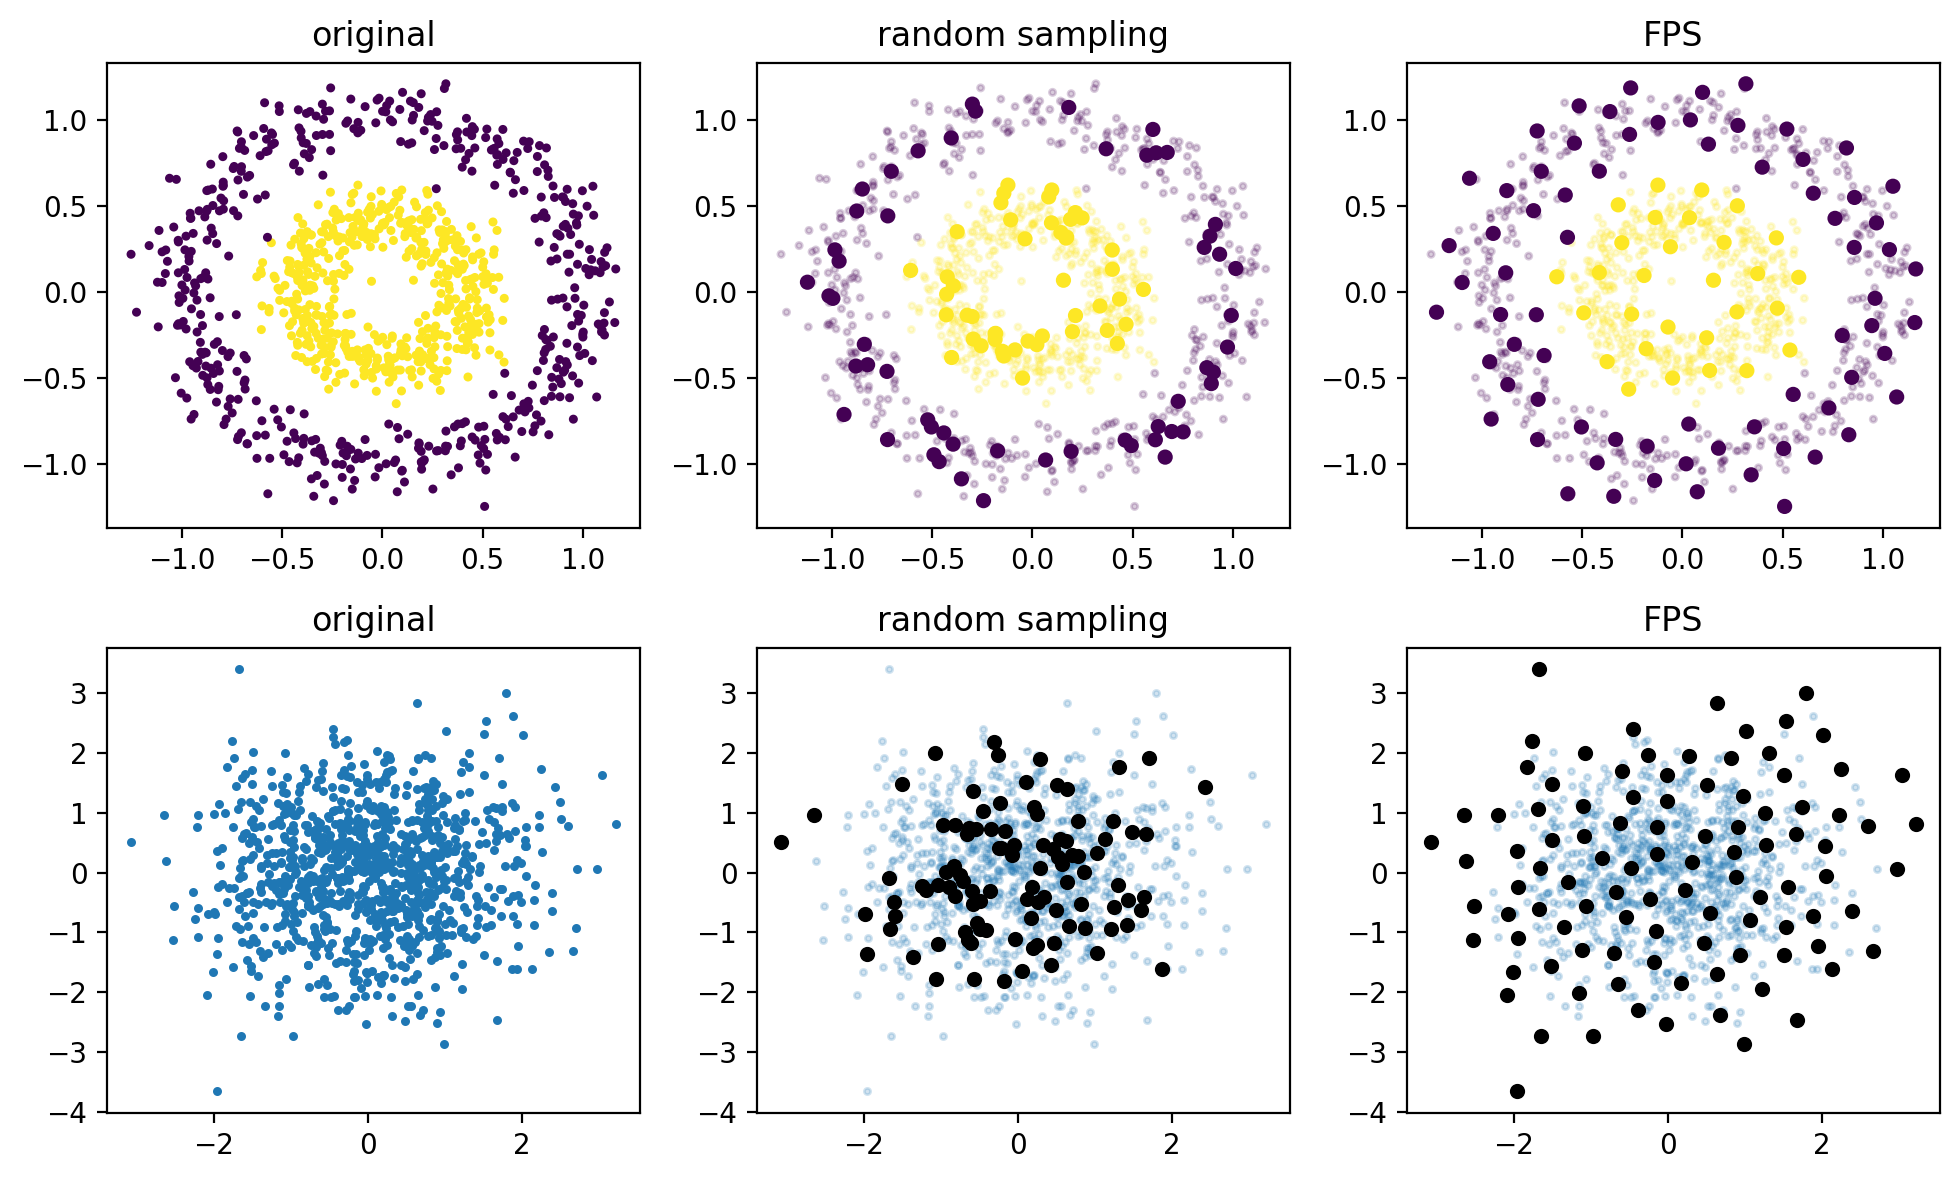

In [19]:
fig1, ax = plots.get_axes(**fig1_setup)
ax[0].scatter(*X.T, c=y, s=5)
ax[1].scatter(*X.T, c=y, s=5, alpha=0.2)
ax[1].scatter(*X_rnd.T, c=y_rnd, s=20)
ax[2].scatter(*X.T, c=y, s=5, alpha=0.2)
y_fps = y[fps_ndx]
ax[2].scatter(*X_fps.T, c=y_fps, s=20)

ax[3].scatter(*X2dG.T, s=5)
ax[4].scatter(*X2dG.T, s=5, alpha=0.2)
ax[4].scatter(*X2dG_rnd.T, c='k', s=20)
ax[5].scatter(*X2dG.T, s=5, alpha=0.2)
ax[5].scatter(*X2dG_fps.T, c='k', s=20)

plt_titles = ['original', 'random sampling', 'FPS']
for i in range(fig1_setup['P']):
    ax[i].set_title(plt_titles[i%fig1_setup['max_col']])

fig1.tight_layout()